K=1, CV Mean Accuracy=0.95
K=2, CV Mean Accuracy=0.95
K=3, CV Mean Accuracy=0.95
K=4, CV Mean Accuracy=0.95
K=5, CV Mean Accuracy=0.96
K=6, CV Mean Accuracy=0.97
K=7, CV Mean Accuracy=0.95
K=8, CV Mean Accuracy=0.97
K=9, CV Mean Accuracy=0.96
K=10, CV Mean Accuracy=0.96
K=11, CV Mean Accuracy=0.94
K=12, CV Mean Accuracy=0.95
K=13, CV Mean Accuracy=0.95
K=14, CV Mean Accuracy=0.94
K=15, CV Mean Accuracy=0.95
K=16, CV Mean Accuracy=0.93
K=17, CV Mean Accuracy=0.93
K=18, CV Mean Accuracy=0.94
K=19, CV Mean Accuracy=0.95
K=20, CV Mean Accuracy=0.95

✅ Best K from cross-validation: 6


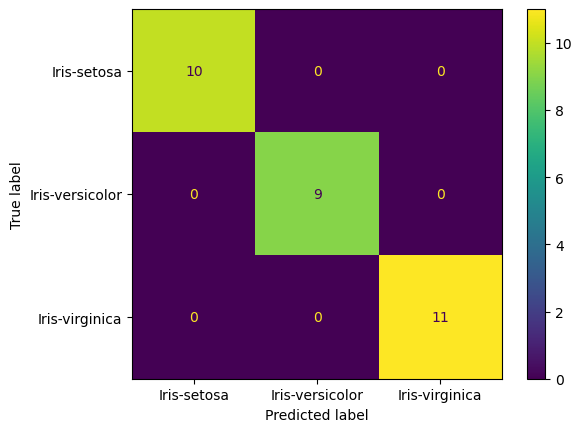

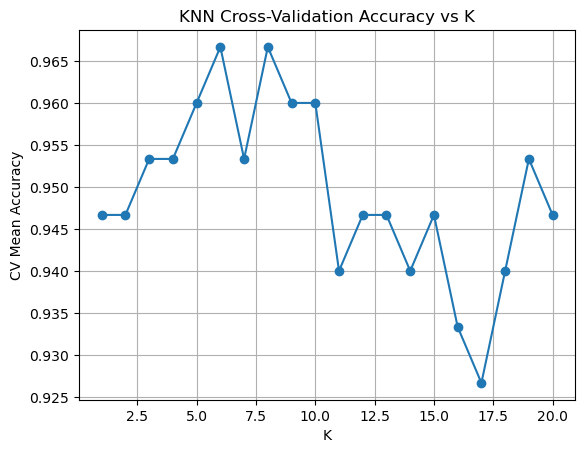

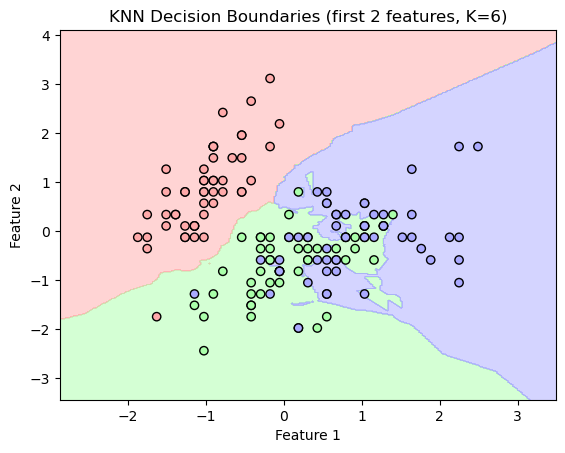

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Loading data
data = pd.read_csv('Iris.csv')
X = data.drop(['Species', 'Id'], axis=1)
y = data['Species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid search for best K using cross-validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"K={k}, CV Mean Accuracy={scores.mean():.2f}")

# Finding best K
best_k = k_values[np.argmax(cv_scores)]
print(f"\n✅ Best K from cross-validation: {best_k}")

# Training with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluating with confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

# Ploting cross-validation scores
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K')
plt.ylabel('CV Mean Accuracy')
plt.title('KNN Cross-Validation Accuracy vs K')
plt.grid()
plt.show()

# Visualize decision boundaries (only using first 2 features)
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.Categorical(Z).codes.reshape(xx.shape)
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=pd.Categorical(y).codes, edgecolor='k', cmap=cmap)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Re-train KNN on first 2 features for visualization
X2 = X_scaled[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X2_train, y2_train)
plot_decision_boundary(X2, y, knn2, f"KNN Decision Boundaries (first 2 features, K={best_k})")
